In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# The Bee Corp - Hive Analysis

In [52]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is DE6B-21A0

 Directory of C:\Users\mario\Desktop\b_corp

08/28/2017  08:39 AM    <DIR>          .
08/28/2017  08:39 AM    <DIR>          ..
08/28/2017  08:23 AM    <DIR>          .ipynb_checkpoints
08/28/2017  08:39 AM           470,565 EDA Hive.ipynb
08/28/2017  08:22 AM        16,141,497 one hive data.xlsx
08/28/2017  08:23 AM        24,062,524 one_hive_data.csv
08/28/2017  08:27 AM           140,637 TypesLSTM.PNG
               4 File(s)     40,815,223 bytes
               3 Dir(s)  37,348,024,320 bytes free


#### xlsx vs csv

In [3]:
%%timeit
hive_data = pd.read_excel('one hive data.xlsx')

49.5 s ± 6.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
hive_data = pd.read_csv('one_hive_data.csv')

724 ms ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
hive_data = pd.read_csv('one_hive_data.csv')

In [6]:
hive_data.head()

,zip_code,latitude,logitude,date,time,ampm,temperature,lookup,lookup2
0,3467,42.96,-72.45,7/27/2016 0:00,11:32:00,PM,120.48,346742578.0,3467.0
1,3467,42.96,-72.45,7/27/2016 0:00,11:32:00,PM,120.48,346742578.0,3467.0
2,3467,42.96,-72.45,8/18/2016 0:00,9:57:00,PM,120.00,346742600.0,3467.0
3,3467,42.96,-72.45,8/18/2016 0:00,9:57:00,PM,120.00,346742600.0,3467.0
4,3467,42.96,-72.45,7/27/2016 0:00,11:31:00,PM,114.39,346742578.0,3467.0


#### There are columns that identify time. I joined the 3 columns into 1 and parsed it so Pandas can idenitfy it as date_time

In [7]:
hive_data = pd.read_csv('one_hive_data.csv', parse_dates=[['date', 'time', 'ampm']])

In [8]:
hive_data.head()

,date_time_ampm,zip_code,latitude,logitude,temperature,lookup,lookup2
0,2016-07-27 23:32:00,3467,42.96,-72.45,120.48,346742578.0,3467.0
1,2016-07-27 23:32:00,3467,42.96,-72.45,120.48,346742578.0,3467.0
2,2016-08-18 21:57:00,3467,42.96,-72.45,120.00,346742600.0,3467.0
3,2016-08-18 21:57:00,3467,42.96,-72.45,120.00,346742600.0,3467.0
4,2016-07-27 23:31:00,3467,42.96,-72.45,114.39,346742578.0,3467.0


#### Rename 'date_time_ampm' column and fix typo 'logitude'

In [9]:
hive_data.rename(columns={'date_time_ampm': 'date_time', 'logitude':'longitude'}, inplace=True)

In [10]:
#hive_df = hive_data.set_index(['zip_code','date_time'])
hive_df = hive_data.set_index(['date_time']).sort_index()

#### Check datetime date range and number of nulls

In [11]:
hive_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425555 entries, 2016-04-15 00:37:59 to 2017-04-12 13:19:04
Data columns (total 6 columns):
zip_code       425555 non-null int64
latitude       425555 non-null float64
longitude      425555 non-null float64
temperature    425554 non-null float64
lookup         78211 non-null float64
lookup2        78211 non-null float64
dtypes: float64(5), int64(1)
memory usage: 22.7 MB


In [12]:
hive_df.isnull().sum() # alternative way to show nulls

zip_code            0
latitude            0
longitude           0
temperature         1
lookup         347344
lookup2        347344
dtype: int64

#### Focus on temperature statistics 

In [13]:
hive_df.describe()

,zip_code,latitude,longitude,temperature,lookup,lookup2
count,425555.000000,425555.000000,425555.000000,425554.000000,7.821100e+04,78211.000000
mean,38022.388895,39.602416,-85.727112,65.136242,1.863721e+09,18636.786807
std,28837.443470,3.735216,14.659318,20.768132,8.694419e+08,8694.418860
min,2115.000000,29.660000,-123.060000,-52.329996,3.467426e+08,3467.000000
25%,19354.000000,37.760000,-88.060000,48.790000,2.265743e+09,22657.000000
50%,23464.000000,40.170000,-79.560000,67.000000,2.265743e+09,22657.000000
75%,54115.000000,41.860000,-76.040000,81.600000,2.323643e+09,23236.000000
max,99019.000000,48.530000,-71.060000,1828.400000,2.878143e+09,28781.000000


#### Use box plot to look for outliers

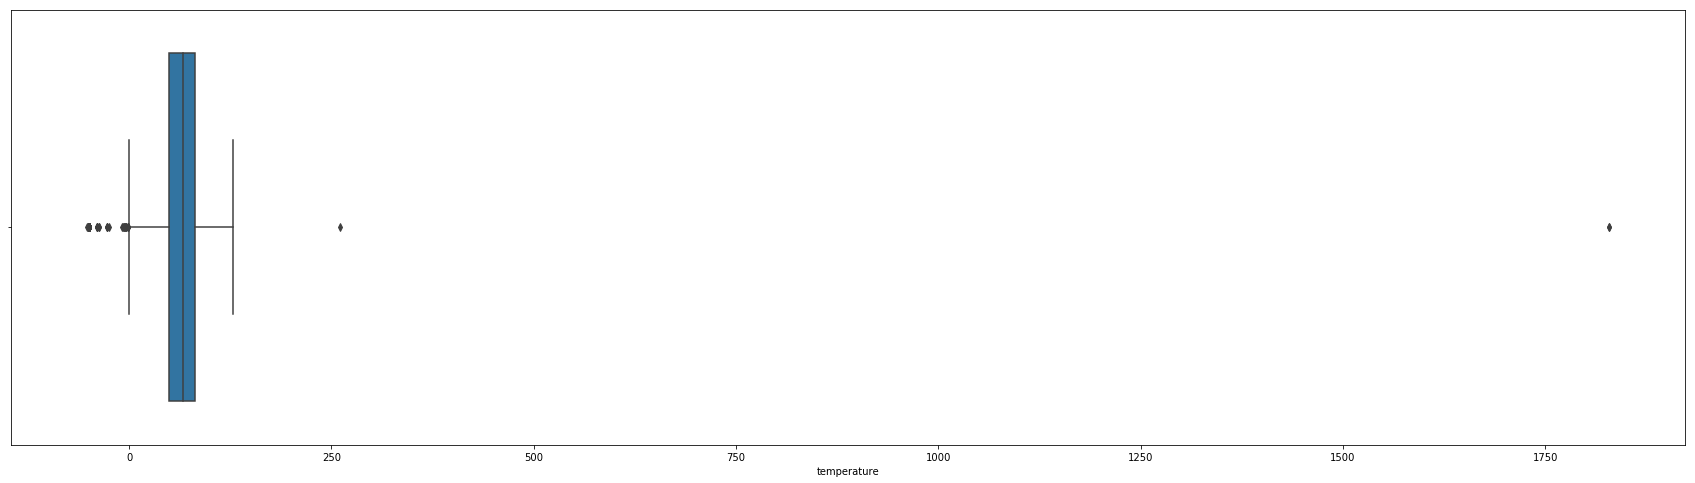

In [14]:
fig, ax = plt.subplots(figsize=(30,8))
sns.boxplot(x='temperature', data=hive_df, orient='h', ax=ax)

#### Examine hives with temperature above 150 F

In [15]:
hive_df[hive_df.temperature > 150]

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2016-06-14 03:12:42,2458,42.33,-71.2,1828.4,NaN,NaN
2016-07-06 01:46:02,2458,42.33,-71.2,1828.4,NaN,NaN
2016-10-16 03:01:01,2458,42.33,-71.2,260.6,NaN,NaN


In [16]:
hive_df[hive_df.zip_code == 2458].loc['2016-06-14']# 00:00:00' : '2016-06-14 12:00:00']

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2016-06-14 02:52:58,2458,42.33,-71.2,88.153770,NaN,NaN
2016-06-14 03:12:42,2458,42.33,-71.2,1828.400000,NaN,NaN
2016-06-14 03:13:11,2458,42.33,-71.2,90.837185,NaN,NaN
2016-06-14 03:13:12,2458,42.33,-71.2,93.018670,NaN,NaN
2016-06-14 03:13:12,2458,42.33,-71.2,89.582349,NaN,NaN
2016-06-14 03:13:12,2458,42.33,-71.2,86.049504,NaN,NaN
2016-06-14 03:13:12,2458,42.33,-71.2,82.709701,NaN,NaN
2016-06-14 03:13:13,2458,42.33,-71.2,83.269551,NaN,NaN
2016-06-14 03:13:13,2458,42.33,-71.2,80.663360,NaN,NaN


In [17]:
hive_df[hive_df.zip_code == 2458].loc['2016-07-06']

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2016-07-06 01:46:02,2458,42.33,-71.2,1828.4,NaN,NaN


In [18]:
hive_df[hive_df.zip_code == 2458].loc['2016-10-16']

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2016-10-16 03:01:01,2458,42.33,-71.2,260.6,NaN,NaN
2016-10-16 03:42:01,2458,42.33,-71.2,68.0,NaN,NaN
2016-10-16 06:54:01,2458,42.33,-71.2,66.2,NaN,NaN
2016-10-16 09:25:01,2458,42.33,-71.2,64.4,NaN,NaN
2016-10-16 17:59:01,2458,42.33,-71.2,75.2,NaN,NaN
2016-10-16 19:39:02,2458,42.33,-71.2,77.0,NaN,NaN
2016-10-16 20:09:02,2458,42.33,-71.2,78.8,NaN,NaN
2016-10-16 20:39:02,2458,42.33,-71.2,80.6,NaN,NaN


#### Remove rows with temperatures above 150F

In [19]:
hive_df.drop(hive_df[hive_df.temperature > 150].index, inplace=True)

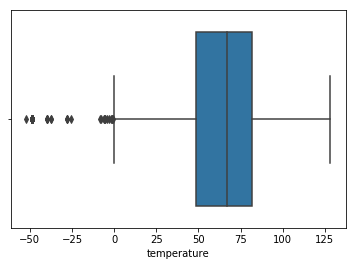

In [20]:
sns.boxplot(x='temperature', data=hive_df, orient='h')

#### Examine devices with temperatures below -20F

In [21]:
hive_df[(hive_df.temperature < -20 )]

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2016-06-14 11:34:52,2458,42.33,-71.20,-52.329996,NaN,NaN
2016-11-03 14:02:03,77077,29.76,-95.38,-40.000000,NaN,NaN
2016-12-03 16:01:34,97212,45.54,-122.64,-40.000000,NaN,NaN
2016-12-03 16:01:36,97212,45.54,-122.64,-40.000000,NaN,NaN
2016-12-03 16:01:45,97212,45.54,-122.64,-40.000000,NaN,NaN
2017-01-26 19:55:03,2115,42.35,-71.06,-25.500000,NaN,NaN
2017-01-29 22:47:18,18901,40.31,-75.12,-37.700000,NaN,NaN
2017-01-29 22:47:20,18901,40.31,-75.12,-37.700000,NaN,NaN
2017-02-06 16:11:04,7930,40.78,-74.69,-49.000000,NaN,NaN


In [22]:
hive_df[(hive_df.temperature < -20 )].zip_code.value_counts()

7960     51
7930     45
8350     15
12601    10
20782     9
8628      6
18901     5
97212     3
30259     3
2458      1
2115      1
77077     1
Name: zip_code, dtype: int64

In [23]:
hive_df[(hive_df.zip_code == 7960)].loc['2017-02-13 17:30:38' : '2017-02-13 17:30:39']

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2017-02-13 17:30:38,7960,40.79,-74.47,36.25,NaN,NaN
2017-02-13 17:30:38,7960,40.79,-74.47,36.73,NaN,NaN
2017-02-13 17:30:38,7960,40.79,-74.47,42.06,NaN,NaN
2017-02-13 17:30:39,7960,40.79,-74.47,-49.00,NaN,NaN
2017-02-13 17:30:39,7960,40.79,-74.47,31.20,NaN,NaN
2017-02-13 17:30:39,7960,40.79,-74.47,20.43,NaN,NaN
2017-02-13 17:30:39,7960,40.79,-74.47,32.25,NaN,NaN
2017-02-13 17:30:39,7960,40.79,-74.47,24.10,NaN,NaN


In [24]:
hive_df.drop(hive_df[hive_df.temperature < -20].index, inplace=True)

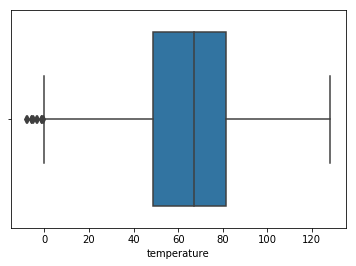

In [25]:
sns.boxplot(x='temperature', data=hive_df, orient='h')

In [26]:
hive_df[(hive_df.temperature < 0 )].zip_code.value_counts()

80504    16
Name: zip_code, dtype: int64

In [27]:
hive_df[(hive_df.zip_code == 80504) & (hive_df.temperature < 0)]

,zip_code,latitude,longitude,temperature,lookup,lookup2
date_time,,,,,,
2017-02-11 19:32:38,80504,40.17,-105.11,-1.62,NaN,NaN
2017-02-11 19:44:01,80504,40.17,-105.11,-8.33,NaN,NaN
2017-02-11 19:45:20,80504,40.17,-105.11,-3.28,NaN,NaN
2017-02-11 19:46:51,80504,40.17,-105.11,-0.08,NaN,NaN
2017-02-11 19:51:51,80504,40.17,-105.11,-1.44,NaN,NaN
2017-02-11 20:08:45,80504,40.17,-105.11,-0.20,NaN,NaN
2017-02-11 20:18:25,80504,40.17,-105.11,-8.05,NaN,NaN
2017-02-11 20:18:25,80504,40.17,-105.11,-5.68,NaN,NaN
2017-02-11 20:18:27,80504,40.17,-105.11,-5.88,NaN,NaN


In [28]:
# hive_df.groupby(hive_df.zip_code).temperature.plot()

#### Drop nulls and unecessary columns

In [29]:
hive_df.isnull().sum()

zip_code            0
latitude            0
longitude           0
temperature         1
lookup         347074
lookup2        347074
dtype: int64

In [30]:
hive_df.dropna(subset=['temperature'], inplace=True) # Alternatives: ForwardFill, BF, Avg

In [31]:
hive_df.drop(['lookup', 'lookup2'], axis=1 ,inplace=True)

In [32]:
hive_df.head()

,zip_code,latitude,longitude,temperature
date_time,,,,
2016-04-15 00:37:59,97212,45.54,-122.64,62.30
2016-04-15 00:44:34,97212,45.54,-122.64,62.10
2016-04-15 02:40:51,97212,45.54,-122.64,76.90
2016-04-15 18:54:20,97212,45.54,-122.64,92.13
2016-04-15 18:54:22,97212,45.54,-122.64,92.48


#### Create new columns:

**timeOfDay**

- Morning: Time from midnight to midday(noon) 12:00 AM - 12:00 PM

- Afternoon: Time from midday(noon) to evening 12:00 PM - 6:00 PM

- Evening: Time from the end of the afternoon to midnight 6:00 PM - 12:00 AM

**ampm**
- AM
- PM


In [33]:
hive_df = hive_df.assign(
    timeofDay=pd.cut(
        hive_df.index.hour,
        [-1,12,17,24],
        labels=['Morning', 'Afternoon', 'Evening']))

In [34]:
hive_df = hive_df.assign(
    ampm=pd.cut(
        hive_df.index.hour,
        [-1,12,24],
        labels=['AM', 'PM']))

In [35]:
hive_df.head()

,zip_code,latitude,longitude,temperature,timeofDay,ampm
date_time,,,,,,
2016-04-15 00:37:59,97212,45.54,-122.64,62.30,Morning,AM
2016-04-15 00:44:34,97212,45.54,-122.64,62.10,Morning,AM
2016-04-15 02:40:51,97212,45.54,-122.64,76.90,Morning,AM
2016-04-15 18:54:20,97212,45.54,-122.64,92.13,Evening,PM
2016-04-15 18:54:22,97212,45.54,-122.64,92.48,Evening,PM


In [38]:
pd.set_option('precision',2)

count    102105.00
mean         68.61
std          18.42
min           3.95
25%          55.76
50%          69.80
75%          82.88
max         128.25
Name: temperature, dtype: float64

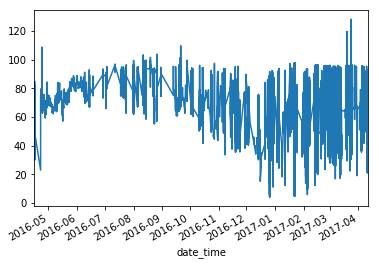

In [39]:
hive_df[hive_df.timeofDay == 'Morning'].temperature.plot()
hive_df[hive_df.timeofDay == 'Morning'].temperature.describe()

count    107322.00
mean         65.76
std          19.81
min           5.25
25%          49.65
50%          67.66
75%          81.80
max         124.82
Name: temperature, dtype: float64

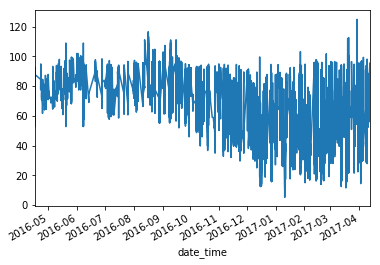

In [40]:
hive_df[hive_df.timeofDay == 'Afternoon'].temperature.plot()
hive_df[hive_df.timeofDay == 'Afternoon'].temperature.describe()

count    215857.00
mean         63.26
std          21.14
min          -8.33
25%          45.61
50%          64.62
75%          80.90
max         120.48
Name: temperature, dtype: float64

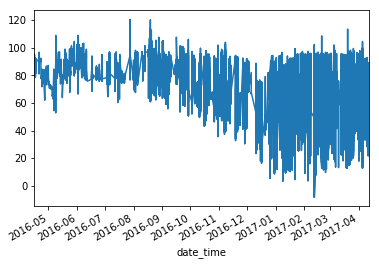

In [41]:
hive_df[hive_df.timeofDay == 'Evening'].temperature.plot()
hive_df[hive_df.timeofDay == 'Evening'].temperature.describe()

The visualizations above look very noisy. In order to get better results, we can use the resample() method.

In [42]:
unsample = hive_df.temperature.resample('5T').mean().interpolate()

In [43]:
upsample = unsample.resample('2W').mean()

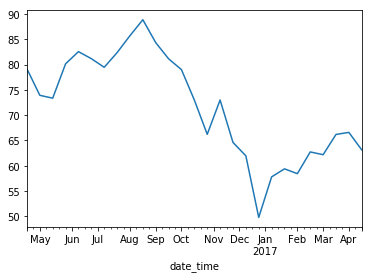

In [44]:
upsample.plot()

In [45]:
hive_df.zip_code.nunique()

59

In [46]:
hive_df.zip_code.value_counts()

22657    38087
97212    29143
12601    24738
3467     18868
80524    17697
49448    17324
22030    16151
20782    14776
23236    11429
15613    11165
30533    11106
31701    11034
77077     9968
23069     9148
23464     8455
48823     8126
7930      7959
60305     7846
80504     7676
38804     7599
18901     7433
29483     7344
8628      7282
23153     7101
97230     6982
7960      6872
30259     6684
19354     5836
28781     5756
43071     5745
11790     5460
8350      5051
72205     4701
63025     4589
20861     4138
24078     4071
84020     3691
48623     3270
54115     3019
45373     3001
2458      2975
77502     2920
2764      2707
53223     2538
11721     2392
94117     2304
2115      2197
43311     2185
60565     2102
60137     1861
98250     1228
99019      996
49006      954
28671      832
22101      569
55901      141
47201       52
64019        8
75979        2
Name: zip_code, dtype: int64

In [47]:
hive_97212 = hive_df[hive_df.zip_code == 97212].temperature # 97212: Device with 2nd most entries

In [48]:
upsample = hive_97212.resample('5T').mean().interpolate() # upsample to seconds then downsample to weeks or months

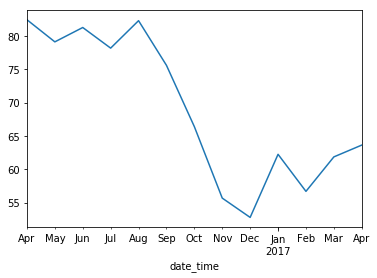

In [49]:
upsample.resample('M').mean().plot()

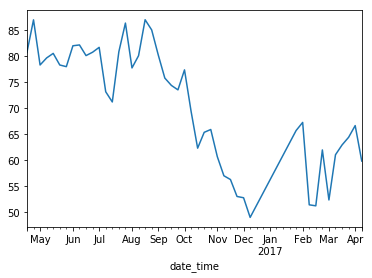

In [50]:
upsample.resample('w').mean().plot();

Insight
- As the hives approached the winter season, the temperature inside the hives dropped.



Next Steps
- Identify regions for devices by using longitude and latitude. Gather new insights by comparing regions.
- Gather outdoor (temperature , wind speed) data. Does the temperature fluctuate with the rise and fall of external temperatures? At what temperature do bees begin to cluster?
- Winter: Gather temperature data from the inner core and outer core of the cluster. Could it be possible to prevent the death of a queen bee if we can identify a key temperature change of the outer core of the bee cluster? 


Goal: 

Investigate daily (minutes, hours) temperature data and identify key patterns (e.g. death of queen bee). Once I can indentify the patterns, I can classify them and test a classification algorithm.


Research deep learning models that are suitable for time series sequence prediction. (Long Short-Term Memory Networks - LSTM) 
1. Learn what LSTM networks are
2. Why do we need LSTM
3. How to develop LSTM models in python 

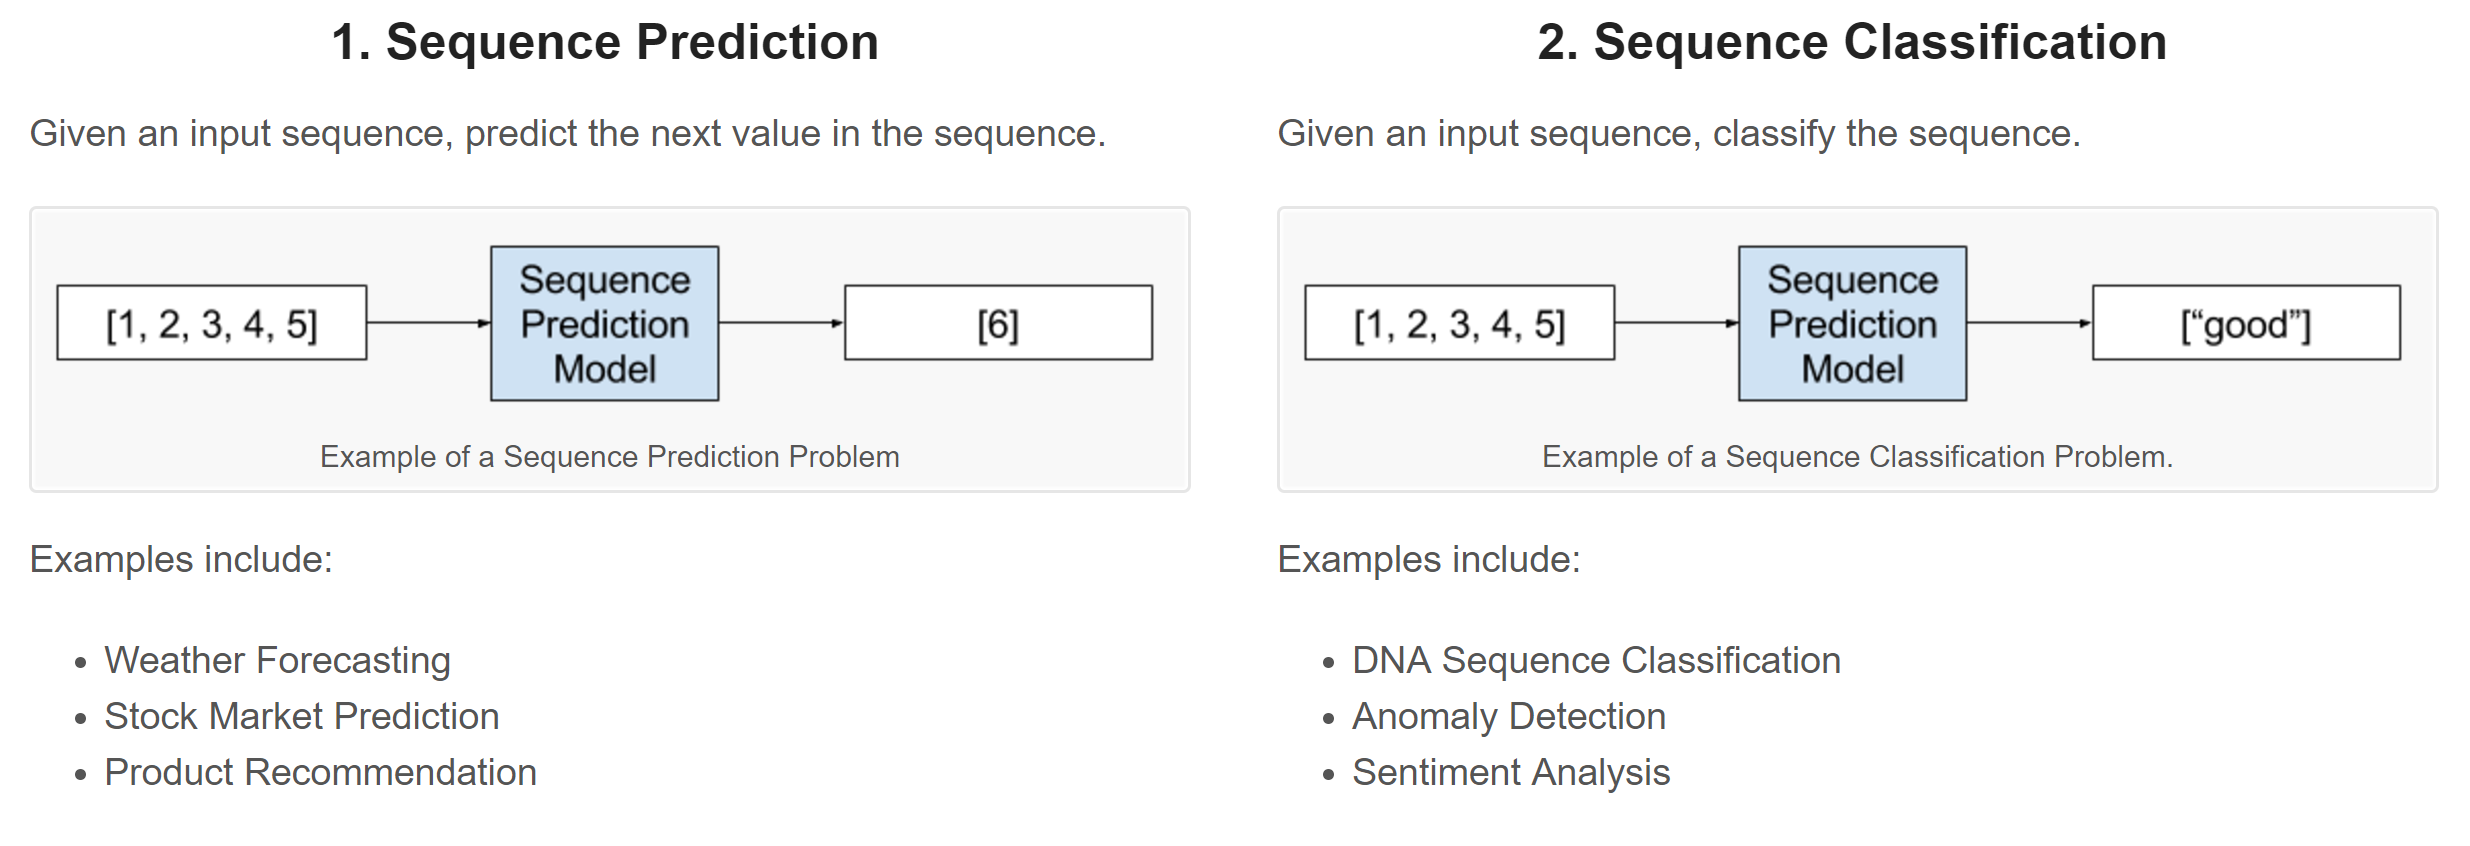

In [51]:
Image(filename='TypesLSTM.png')